# Read reduced ALTO file in csv format

## The csv format is described below

```
    event	integer	event number : as counted by readout code
    Sec2018	unsigned integer	seconds since 1st January 2018, 00:00 UTC
    Nanosecond  unsigned integer	nanoseconds in the current second
    Q[]     float (array)	Integrated charge in pe for a gain of 10^7. Integration window= [ToM-1.5*RiseTime, ToM+1.5*FallTime]
    TOM[]   float (array)	in ns, interpolated with a parabola
    TTH[]   float (array)	in ns, linear interpolation: time of crossing of THRESHOLD2 = -100 mV in current version
    A[]     short (array)	maximum amplitude of the signal, in tenth of mV --> A[i]/10. to be used
    TOT[]   short (array)	Time over Threshold, of -10mV (see the define THRESHOLD -10), in samples
    FT[]    short (array)	Fall Time (after the maximum, so is a rise) in samples
    RT[]    short (array)	Rise Time (before the maximum, so is a fall) in samples
    FWHM[]  short (array)	Full width at Half Maximum, in samples
```

## Reading into pandas

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from glob import glob

In [3]:
ch_ids = {0:'CT0',1:'CT1',4:'ST0',11:'ST1',
          5:'SATopCT0',6:'SA_Nth',7:'SA_Mid',10:'SA_Sth',
          2:'TrigBot',3:'TrigTop',8:'CanBot',9:'CanTop'}
# Use a more logical order, first 4 are the main detectors, rest are monitoring detectors
ch_show = np.array([0, 1, 4, 11, 5, 6, 7, 10, 2, 3, 8, 9])
Num_chans = len(ch_ids)

In [4]:
DataFiles = glob("ALTO_reduced.gz")
print(DataFiles)

['ALTO_reduced.gz']


## Example of reading in CSV file

In [5]:
import pandas as pd

from ast import literal_eval

#df = pd.read_csv("ALTO_reduced.gzip",usecols=['wfana_Q'],nrows=1000,tupleize_cols=True,converters={"wfana_Q": eval})

def convert_tuple(x):
    return np.array([literal_eval(val) for val in x.strip("[]").split()])

df = pd.read_csv("ALTO_reduced.gzip",nrows=1000,
                 converters={'wfana_Q': convert_tuple, 'wfana_TOM': convert_tuple, 'wfana_TTH': convert_tuple,
                             'wfana_A': convert_tuple, 'wfana_TOT': convert_tuple, 
                             'wfana_FT': convert_tuple, 'wfana_RT': convert_tuple, 'wfana_FWHM': convert_tuple})

df.head()

Unnamed: 0  wfana_event  wfana_Sec2018  wfana_Nanosecond  \
0           0    256000001       37868446         946278000   
1           1    256000002       37868446         946770000   
2           3    256000004       37868446         947764000   
3           4    256000005       37868446         948337000   
4           5    256000006       37868446         948711000   

                                             wfana_Q  \
0  [-46.96669, -53.976936, -0.22908521, -0.036776...   
1  [-0.100025296, -20.5706444, -0.0579589233, -0....   
2  [-13.8579321, -0.0366093591, -0.0639304519, -0...   
3  [-19.517384, -28.554325, -0.14260253, -0.01092...   
4  [-25.5095844, -0.0801782161, -0.0769165233, 0....   

                                           wfana_TOM  \
0  [151.10178, 156.74281, 99.21875, 82.835365, 14...   
1  [164.9342, 122.562355, 194.87746, 3.3482144, 5...   
2  [134.98943, 252.84091, 139.23387, 87.10443, 13...   
3  [158.74524, 193.79398, 152.74123, 247.25, 158....   
4  [135.74591, 172.67308, 297.7016, 257.69736, 13...   

                                           wfana_TTH  \
0  [145.79799, 150.70985, -1000.0, -1000.0, 138.3...   
1  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
2  [-1000.0, -1000.0, -1000.0, -1000.0, 129.00595...   
3  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
4  [-1000.0, -1000.0, -1000.0, -1000.0, 130.38927...   

                                             wfana_A  \
0  [-2769, -3376, -23, -21, -9127, -52, -17, -106...   
1  [-16, -1375, -20, -21, -28, -42, -22, -21, -20...   
2  [-964, -24, -14, -20, -2327, -58, -19, -18, -2...   
3  [-1256, -938, -26, -25, -484, -45, -19, -19, -...   
4  [-1779, -22, -20, -19, -3461, -33, -15, -21, -...   

                                  wfana_TOT  \
0  [21, 15, 0, 0, 36, 0, 0, 19, 0, 0, 0, 0]   
1    [0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15]   
2     [9, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0]   
3   [11, 16, 0, 0, 9, 0, 0, 0, 0, 0, 0, 25]   
4    [11, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0]   

                                  wfana_FT  \
0  [12, 8, 2, 3, 23, 2, 1, 15, 1, 2, 3, 1]   
1    [1, 8, 3, 3, 2, 2, 1, 2, 2, 4, 1, 19]   
2    [7, 2, 1, 1, 11, 2, 1, 5, 2, 3, 2, 1]   
3  [9, 18, 3, 1, 10, 2, 1, 4, 1, 2, 1, 21]   
4    [8, 2, 3, 1, 13, 5, 2, 2, 1, 2, 1, 1]   

                                wfana_RT  \
0   [4, 4, 5, 2, 4, 5, 1, 8, 4, 3, 2, 4]   
1   [1, 3, 2, 1, 5, 2, 3, 1, 1, 1, 1, 4]   
2   [4, 1, 4, 3, 4, 1, 5, 1, 2, 3, 1, 4]   
3  [3, 10, 2, 3, 4, 1, 3, 2, 3, 1, 1, 5]   
4   [3, 1, 1, 1, 5, 2, 3, 1, 3, 4, 2, 2]   

                              wfana_FWHM  
0  [5, 6, 3, 3, 9, 4, 2, 10, 2, 4, 5, 3]  
1   [2, 5, 2, 3, 2, 2, 3, 2, 3, 2, 2, 8]  
2   [5, 2, 4, 2, 7, 2, 3, 2, 2, 2, 3, 3]  
3   [5, 5, 2, 2, 6, 3, 3, 2, 3, 2, 2, 7]  
4   [5, 2, 2, 2, 8, 3, 3, 2, 2, 3, 3, 2]

## Example of plotting in this panda structure (with Series/arrays within cells)

/scr/punch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/scr/punch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


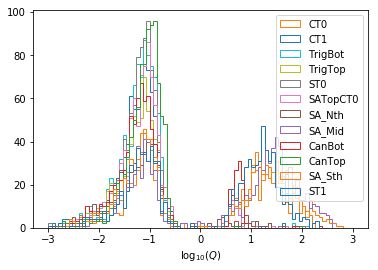

In [6]:
import pandas as pd

#l10_QsT = np.log10((-df['wfana_Q']).apply(pd.Series).transpose())
l10_QsT = np.log10((-df['wfana_Q']).apply(pd.Series).transpose())

#plt.hist(Qs.transpose(),range=(-3,3),bins=90,histtype='step')
plt.hist(l10_QsT,range=(-3,3),bins=90,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(Q)$')
plt.show()

/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/scr/punch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


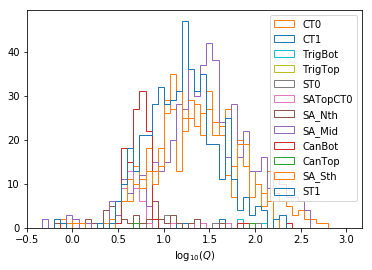

In [7]:
plt.hist(l10_QsT,range=(-1/3,3),bins=50,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(Q)$')
plt.show()

In [12]:
# Get the log10 of the Amplitude (in tenths of mV), subtract 1 to turn into log10(mV)
l10_AsT = np.log10((-df['wfana_A']).apply(pd.Series).transpose())-1

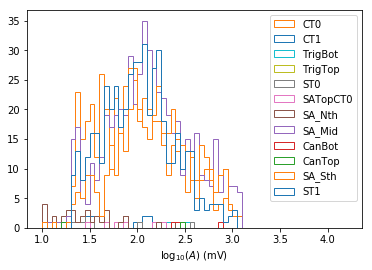

In [13]:
plt.hist(l10_AsT,range=(1,4.2),bins=64,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$\log_{10}(A)$ (mV)')
plt.show()

In [9]:
TOMsT = (df['wfana_TOM']).apply(pd.Series).transpose()

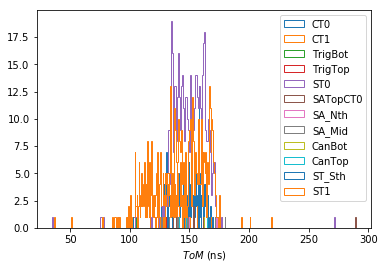

In [10]:
#plt.hist(TOMsT.iloc[0][l10_QsT.iloc[0]>.3],bins=256,histtype='step')
for i in range(Num_chans):
    plt.hist(TOMsT.iloc[i][l10_QsT.iloc[i]>1],bins=256,histtype='step')
plt.legend([ch_ids[i] for i in range(Num_chans)])
plt.xlabel(r'$ToM$ (ns)')
plt.show()

### Example of plotting one thing vs another for the same channels within an event

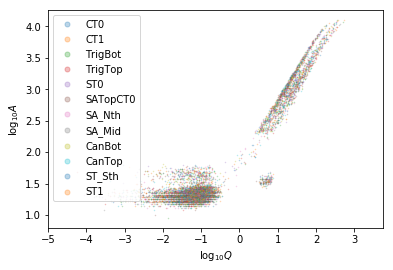

In [11]:
#plt.plot(l10_QsT.iloc[0],l10_AsT.iloc[0],'.')
plt.plot(l10_QsT,l10_AsT,'.',ms=1,alpha=.3)
plt.xlim(xmin=-5)
plt.xlabel(r'$\log_{10}Q$')
plt.ylabel(r'$\log_{10}A$')
plt.legend([ch_ids[i] for i in range(Num_chans)],markerscale=10)
plt.show()

### Example of plotting one thing vs another for different channels within an event

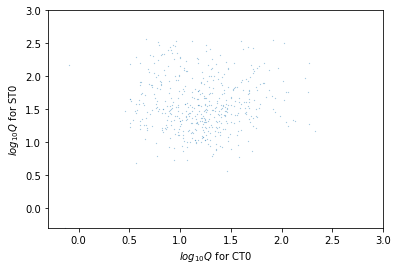

In [12]:
xax,yax = 0,4 # ST0 vs CT0
#xax,yax = 0,1 # CT1 vs CT0
plt.plot(l10_QsT.iloc[xax],l10_QsT.iloc[yax],'.',ms=.3)
plt.xlim((-.3,3))
plt.ylim((-.3,3))
plt.xlabel(r'$log_{10}Q$ for '+ch_ids[xax])
plt.ylabel(r'$log_{10}Q$ for '+ch_ids[yax])
plt.show()
#plt.scatter(l10_QsT.iloc[0],l10_QsT.iloc[4],marker='.',ms=.1)

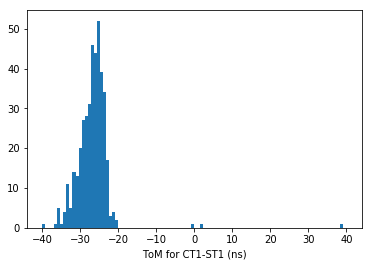

In [13]:
xax,yax = 0,4 # ST0 vs CT0
xax,yax = 1,11 # ST1 vs CT1
#xax,yax = 0,1 # CT1 vs CT0
#xax,yax = 4,11 # ST1 vs ST0
both = [a and b for a,b in zip(l10_QsT.iloc[xax]>.3,l10_QsT.iloc[yax]>.3)] 
plt.plot(TOMsT.iloc[xax][both],TOMsT.iloc[yax][both],'.',ms=.3)
plt.plot(np.linspace(80,180,100),np.linspace(80,180,100),ls='--')
#plt.xlim((-.3,3))
#plt.ylim((-.3,3))
plt.xlabel('ToM for '+ch_ids[xax]+' (ns)')
plt.ylabel('ToM for '+ch_ids[yax]+' (ns)')
plt.show()
#plt.scatter(l10_QsT.iloc[0],l10_QsT.iloc[4],marker='.',ms=.1)

plt.hist(TOMsT.iloc[xax][both]-TOMsT.iloc[yax][both],bins=100,range=(-40,40))
plt.xlabel('ToM for '+ch_ids[xax]+'-'+ch_ids[yax]+' (ns)')
plt.show()


In [35]:
# Example to select events where the signal exceeds -400 (~photons detected) in one of the channels of the event
df[[min(series)<-400 for series in df['wfana_Q']]]

Unnamed: 0  wfana_event  wfana_Sec2018  wfana_Nanosecond  \
551         571    256000572       37868447         587987000   
632         653    256000654       37868447         676944000   
677         699    256000700       37868447         735962000   
927         957    256000958       37868448           7986000   

                                               wfana_Q  \
551  [-0.043809328, -8.7032614, 0.021098807, 0.0157...   
632  [-76.264549, -0.047877733, -0.05212098, -0.068...   
677  [-0.19628985, -6.440064, -0.055419255, -0.1051...   
927  [-0.0469261967, -52.3012161, -0.0795234516, -0...   

                                             wfana_TOM  \
551  [197.39197, 124.545456, 99.69262, 46.715115, 7...   
632  [126.71287, 267.31482, 57.12838, 28.657408, 11...   
677  [169.96794, 118.94643, 159.90132, 142.7993, 19...   
927  [54.916668, 131.75906, 32.25, 147.78615, 27.64...   

                                             wfana_TTH  \
551  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
632  [120.48254, -1000.0, -1000.0, -1000.0, -1000.0...   
677  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
927  [-1000.0, 126.64143, -1000.0, -1000.0, -1000.0...   

                                               wfana_A  \
551  [-20, -571, -21, -25, -21, -47, -20, -24, -20,...   
632  [-4843, -23, -23, -16, -21, -50, -21, -22, -22...   
677  [-22, -417, -17, -21, -23, -51, -17, -25, -25,...   
927  [-19, -3590, -20, -24, -27, -35, -19, -17, -15...   

                                  wfana_TOT  \
551   [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63]   
632  [25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70]   
677   [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67]   
927  [0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51]   

                                   wfana_FT  \
551  [1, 10, 1, 1, 1, 2, 1, 3, 4, 1, 4, 29]   
632   [8, 2, 2, 2, 2, 1, 1, 4, 1, 2, 4, 31]   
677   [4, 7, 1, 3, 4, 2, 1, 1, 1, 1, 4, 25]   
927   [1, 9, 2, 4, 3, 2, 1, 1, 2, 1, 1, 28]   

                                  wfana_RT  \
551   [1, 4, 2, 3, 4, 1, 3, 2, 1, 3, 2, 6]   
632   [4, 2, 3, 1, 1, 2, 1, 2, 2, 1, 6, 7]   
677  [3, 4, 1, 1, 1, 2, 1, 11, 3, 1, 6, 6]   
927   [1, 4, 2, 1, 1, 1, 1, 6, 1, 1, 1, 6]   

                                wfana_FWHM  
551  [2, 5, 2, 3, 2, 2, 2, 3, 2, 2, 2, 12]  
632  [6, 2, 3, 3, 2, 3, 2, 4, 2, 2, 3, 12]  
677  [2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 11]  
927  [2, 4, 2, 2, 2, 3, 2, 2, 3, 2, 2, 11]

In [54]:
# Example to select events where there is a coincidence of more than 4 signals greater than 2 photons detected
df[[sum(series<-2)>=4 for series in df['wfana_Q']]]

Unnamed: 0  wfana_event  wfana_Sec2018  wfana_Nanosecond  \
0             0    256000001       37868446         946278000   
3             4    256000005       37868446         948337000   
20           22    256000023       37868446         957712000   
21           23    256000024       37868446         958095000   
48           51    256000052       37868446         972049000   
51           54    256000055       37868446         973391000   
78           82    256000083       37868447           2527000   
285         294    256000295       37868447         272083000   
329         341    256000342       37868447         318720000   
345         357    256000358       37868447         342349000   
354         367    256000368       37868447         354289000   
418         431    256000432       37868447         426013000   
426         440    256000441       37868447         436617000   
698         720    256000721       37868447         757469000   
834         863    256000864       37868447         901974000   
837         867    256000868       37868447         904706000   
882         912    256000913       37868447         960554000   

                                               wfana_Q  \
0    [-46.96669, -53.976936, -0.22908521, -0.036776...   
3    [-19.517384, -28.554325, -0.14260253, -0.01092...   
20   [-5.7447004, -0.044821229, -0.069359295, -5.71...   
21   [-16.278334, -0.19030218, -0.14666601, -5.8875...   
48   [-0.071201496, -27.266088, -0.064059861, -69.5...   
51   [-18.898682, -0.22678471, -0.015983365, -6.019...   
78   [-31.50975, -0.14212391, -0.1105664, -5.049501...   
285  [-16.257753, -0.17959103, -0.21131334, -5.7428...   
329  [-4.3917785, -0.068233825, -0.065624148, -5.80...   
345  [-0.117575236, -68.4100952, -0.0316075906, -3....   
354  [-0.017699555, -7.8367314, -0.13073535, -3.459...   
418  [-0.035197411, -11.586792, -0.034213684, -6.91...   
426  [-0.120761365, -96.1270676, -0.0266665481, -6....   
698  [-0.0722829476, -10.2820206, -0.110651769, -4....   
834  [-27.899897, -31.319925, -0.14095175, 0.042071...   
837  [-37.887749, -0.098856702, -0.38952208, -6.358...   
882  [-52.8323135, -83.770813, -0.124885574, -0.082...   

                                             wfana_TOM  \
0    [151.10178, 156.74281, 99.21875, 82.835365, 14...   
3    [158.74524, 193.79398, 152.74123, 247.25, 158....   
20   [149.78592, 167.41072, 219.43628, 167.4734, 15...   
21   [144.09483, 12.535714, 54.892857, 4.8, 150.188...   
48   [285.0, 141.87187, 192.78847, 125.816605, 232....   
51   [147.7874, 126.89103, 175.4327, 188.19444, 151...   
78   [143.19168, 212.72887, 216.63461, 205.13889, 1...   
285  [150.06975, 91.63461, 15.138889, 27.239584, 15...   
329  [143.9, 247.72058, 135.61046, 220.52966, 149.0...   
345  [132.45, 143.29889, 254.34702, 7.148876, 27.93...   
354  [204.55, 124.61134, 112.339745, 7.28125, 50.58...   
418  [29.828947, 120.772255, 135.01866, 227.68382, ...   
426  [130.57204, 130.48285, 32.044117, 149.80933, 2...   
698  [130.06355, 164.89786, 299.7619, 67.82692, 108...   
834  [131.11732, 162.35652, 55.65972, 287.6184, 132...   
837  [145.52077, 53.210785, 57.544643, 22.623627, 1...   
882  [155.52167, 177.40828, 232.42346, 287.48737, 1...   

                                             wfana_TTH  \
0    [145.79799, 150.70985, -1000.0, -1000.0, 138.3...   
3    [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
20   [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
21   [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
48   [-1000.0, -1000.0, -1000.0, 118.026505, -1000....   
51   [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
78   [139.13853, -1000.0, -1000.0, -1000.0, -1000.0...   
285  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
329  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
345  [-1000.0, 138.03934, -1000.0, -1000.0, -1000.0...   
354  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
418  [-1000.0, -1000.0, -1000.0, -1000.0, -1000.

In [64]:
# Example to select events where there is a coincidence of 
#  more than 4 signals greater than 1 photons detected in the 4 main detectors
df[[sum(series[ch_show][0:4]<-1)>=4 for series in df['wfana_Q']]]

Unnamed: 0  wfana_event  wfana_Sec2018  wfana_Nanosecond  \
3             4    256000005       37868446         948337000   
882         912    256000913       37868447         960554000   

                                               wfana_Q  \
3    [-19.517384, -28.554325, -0.14260253, -0.01092...   
882  [-52.8323135, -83.770813, -0.124885574, -0.082...   

                                             wfana_TOM  \
3    [158.74524, 193.79398, 152.74123, 247.25, 158....   
882  [155.52167, 177.40828, 232.42346, 287.48737, 1...   

                                             wfana_TTH  \
3    [-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, ...   
882  [150.3622, 170.98186, -1000.0, -1000.0, 145.18...   

                                               wfana_A  \
3    [-1256, -938, -26, -25, -484, -45, -19, -19, -...   
882  [-3836, -5507, -20, -30, -9550, -56, -18, -22,...   

                                    wfana_TOT  \
3     [11, 16, 0, 0, 9, 0, 0, 0, 0, 0, 0, 25]   
882  [14, 27, 0, 0, 49, 0, 0, 0, 0, 0, 0, 23]   

                                    wfana_FT  \
3    [9, 18, 3, 1, 10, 2, 1, 4, 1, 2, 1, 21]   
882   [8, 9, 6, 1, 25, 1, 3, 2, 2, 3, 1, 20]   

                                  wfana_RT  \
3    [3, 10, 2, 3, 4, 1, 3, 2, 3, 1, 1, 5]   
882   [3, 4, 2, 1, 5, 1, 2, 3, 1, 1, 2, 4]   

                               wfana_FWHM  
3    [5, 5, 2, 2, 6, 3, 3, 2, 3, 2, 2, 7]  
882  [5, 5, 2, 2, 8, 2, 2, 4, 2, 2, 2, 8]